In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io

In [2]:
parnames = ["as_2","as_4", 
            "Rp_2", "Rp_4",
            "epse_2", "epse_3", "epse_4", 
            "epss_2", "epss_4", 
            "k0_2", "k0_4", 
            "De_2", "De_3", "De_4", 
            "brug", "cse_2", "cse_4", "ce_2"]
parnames_tex = ["$a_{s,ne}$","$a_{s,pe}$", 
                "$R_{p,ne}$", "$R_{p,pe}$",
                "$\epsilon_{e,ne}$", "$\epsilon_{e,sep}$", "$\epsilon_{e,pe}$", 
                "$\epsilon_{s,ne}$", "$\epsilon_{s,pe}$", 
                "$k_{ne}$", "$k_{pe}$", 
                "$D_{e,ne}$", "$D_{e,sep}$", "$D_{e,pe}$", 
                "$brugg$", "$c_{se,ne}^0$", "$c_{se,pe}^0$", "$c_e^0$"]
param_true = [723600,
              885000,
              2e-6,
              2e-6,
              0.485,
              0.724,
              0.385,
              0.0326,
              0.0250,
              5.031e-11,
              2.334e-11,
              7.5e-10 ,
              7.5e-10 ,
              7.5e-10 ,
              4,
              26128,
              25751,
              1000]

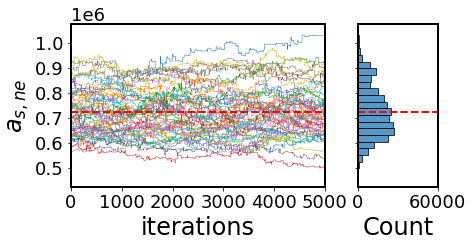

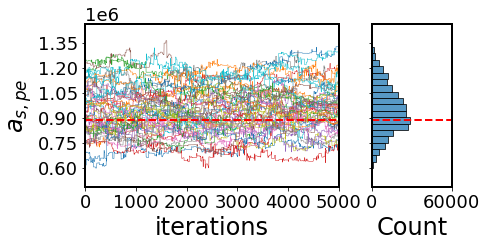

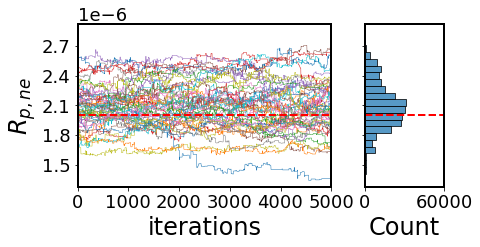

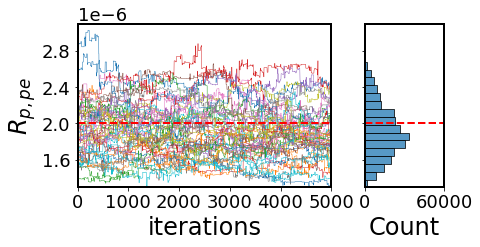

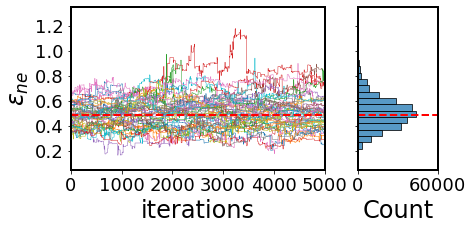

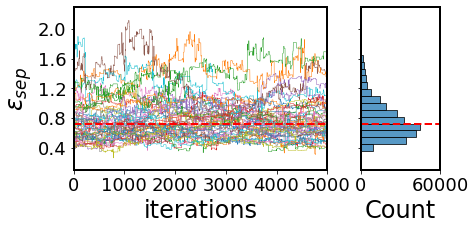

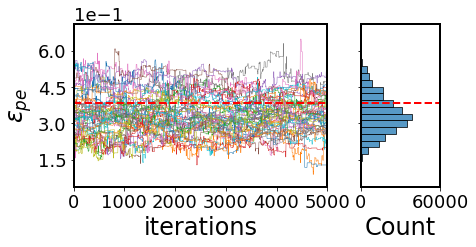

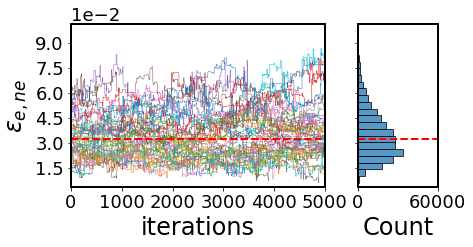

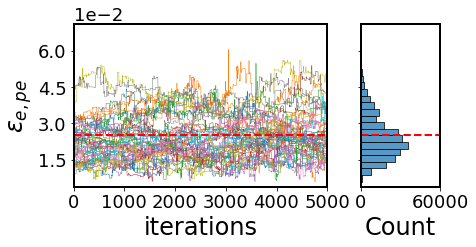

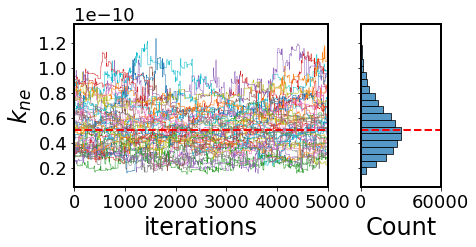

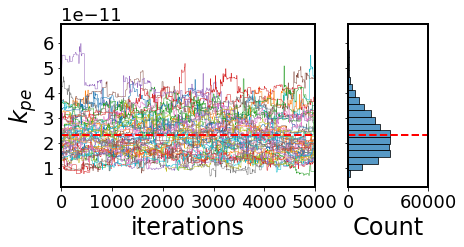

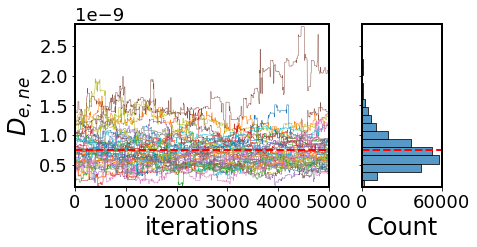

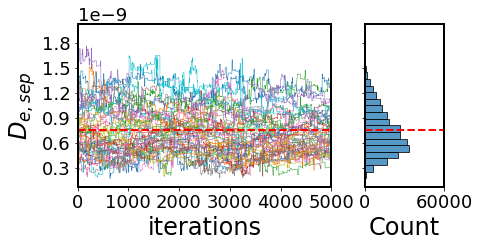

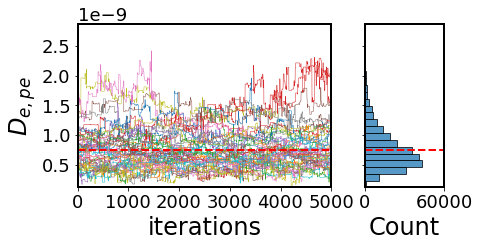

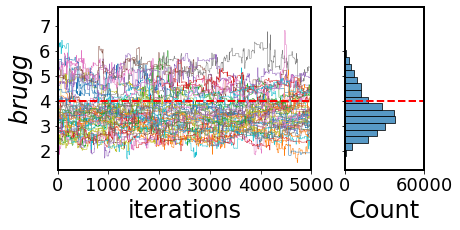

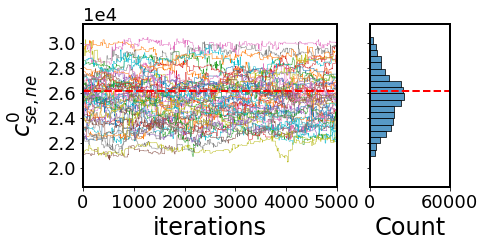

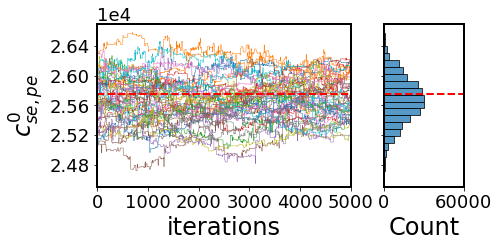

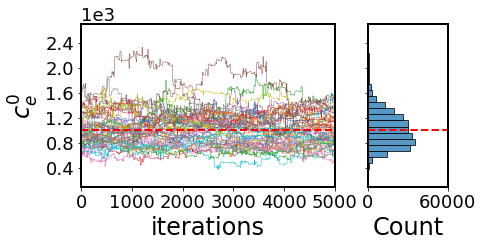

In [38]:
plt.rc('axes', linewidth=2)

# read mcmc samples of Nsample x Nparam x Nchain
sample = scipy.io.loadmat(...)['Sample']
nsample, nparam, nchain = sample.shape

for param_idx in range(nparam):
    
    # Figure 1: plot chains
    plt.figure(figsize=(10,3))
    ax = plt.subplot(1,2,1)
    for i in range(nchain):
        plt.plot(sample[:,param_idx,i], linewidth=.5)
    plt.axhline(y=param_true[param_idx], color='r', linestyle='--', linewidth=2)
    plt.xlabel('iterations', fontsize=24)
    plt.ylabel(parnames_tex[param_idx], fontsize=24)
    plt.xticks(fontsize=18)
    ax.xaxis.get_offset_text().set_fontsize(18)
    ax.yaxis.get_offset_text().set_fontsize(18)
    plt.ticklabel_format(axis='y', scilimits=(0,0))
    plt.xlim([0,5000])
    
    # auto tick arrangement
    ax.yaxis.set_major_locator(plt.MaxNLocator(6, min_n_ticks=2))
    ticks = ax.get_yticks()
    ticks = ticks[ticks >= 0]
    dticks = ticks[1] - ticks[0]
    plt.yticks(ticks, fontsize=18)
    plt.ylim([ticks[0] + dticks/4, ticks[-1] - dticks/4])
    
    # Figure 2: plot histogram
    sample_tmp = sample[:,param_idx,:].flatten()
    plt.subplot(1,6,4)
    sns.histplot(y=sample_tmp, bins=20)
    plt.axhline(y=param_true[param_idx], color='r', linestyle='--', linewidth=2)
    plt.xlabel('Count', fontsize=24)
    plt.yticks(ax.get_yticks(), [])
    plt.ylim(ax.get_ylim())
    plt.xlim([0, 60000])
    plt.xticks([0, 60000], fontsize=18)

    plt.show()